## Load handwritten image and predict with trained model

In [68]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import keras
from keras.models import load_model
from __future__ import print_function
# from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import load_model #save and load models
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import keras.backend as K


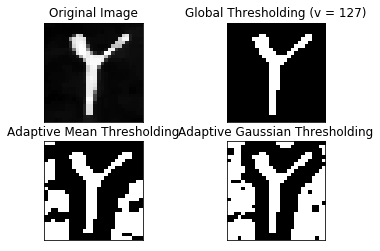

In [69]:
img = cv2.imread('y2.jpg',0)
img = ~cv2.resize(img, (28,28)) 
img = cv2.medianBlur(img,3)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [70]:
# choose a proper method
img=images[1]
#plt.imshow(img,cmap='Greys_r')
imgp=np.reshape(img,(1,28,28,1))
imgp = imgp.astype('float32')
imgp /= 255

In [71]:
K.clear_session()
model = load_model("emnist_BatchNormalization_32.h5")
preds = model.predict(imgp)
print(preds)
print(np.argmax(preds))
if np.argmax(preds)<10:
    ascii=48+np.argmax(preds)
else:
    ascii=87+np.argmax(preds)
print(chr(ascii))

[[1.06626149e-15 4.87074756e-11 3.65751029e-15 4.35271827e-13
  3.99492183e-06 4.12458045e-12 1.80574468e-13 3.71933396e-07
  1.64713132e-09 1.02083719e-08 2.48088242e-15 4.84509675e-16
  1.20266254e-17 3.55851379e-16 1.83958073e-16 1.02931767e-10
  1.47933374e-10 1.03054738e-10 6.54673538e-11 5.49474866e-09
  1.65078049e-08 4.95824104e-10 1.77552223e-10 3.25840549e-10
  1.34115163e-15 5.81523496e-09 8.78099016e-08 1.37316192e-09
  1.39481178e-14 1.83621243e-08 2.15513215e-11 2.28713049e-08
  8.12713168e-08 1.01595585e-08 9.99995351e-01 7.74949834e-14]]
34
y
